In [ ]:
!pip install spectral

     |████████████████████████████████| 184 kB 7.2 MB/s 
  Created wheel for spectral: filename=spectral-0.22.2-py3-none-any.whl size=212954 sha256=dcc52d2877beb6116c8c50ab649cb21ee8080a44d475bef9f9c969bdb8fdec7b
  Stored in directory: /root/.cache/pip/wheels/8b/3c/53/b5300d56bee75c16de9b19cd481c419cc63929f2e4019a6235
Successfully built spectral


In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,10)

In [ ]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
import tifffile as tif
from spectral import imshow
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Leitura dos arquivos
img = tif.imread('/content/cubo_L7.tif')
roi = tif.imread('/content/ROI_cubo_L7.tif')


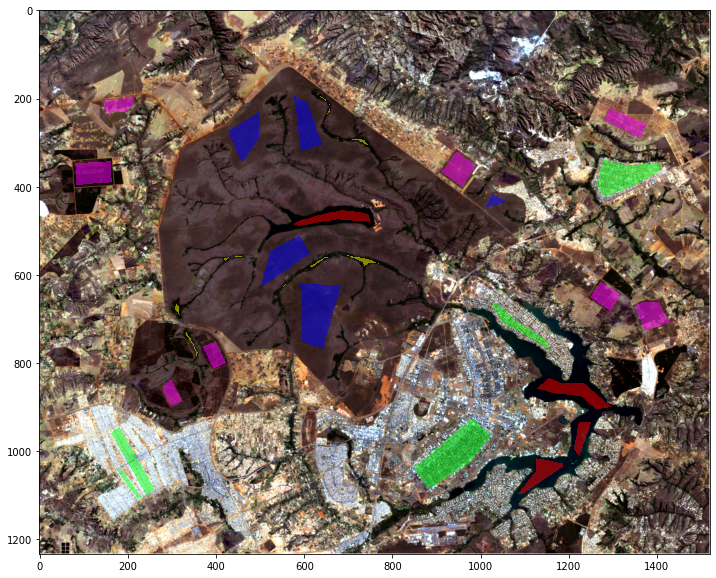

In [ ]:

# Visualização das ROI
view = imshow(img, (2,1,0), classes = roi, stretch=(0.02) )
view.set_display_mode('overlay')

In [ ]:

X = img[roi > 0] # Dados de treino
y = roi[roi > 0] # Classes conhecidas (Ground Truth)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), 
                                                    test_size=0.30, stratify = y.ravel())

In [ ]:
# Instanciando classificador (K = 10)
knn = KNeighborsClassifier(n_neighbors=10)

# Ajustando o modelo
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
# Fazendo predição (nos dados de treino)
pred = knn.predict(X)

# Visualizando métricas de acurácia na fase de treinamento
print(classification_report(y, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     14332
           2       0.99      0.98      0.99     30413
           3       0.91      0.99      0.95     28193
           4       0.94      0.89      0.92      4481
           5       0.95      0.88      0.92     24889

    accuracy                           0.96    102308
   macro avg       0.96      0.95      0.95    102308
weighted avg       0.96      0.96      0.96    102308



In [ ]:
pred = knn.predict(X_test)
print(classification_report(y_test, pred))

In [ ]:
# Criando um vetor de duas dimensões para a classificação pixel a pixel
img2d= img.reshape(img.shape[0] * img.shape[1], img.shape[2])

# Classificação para cada pixel
pred2d = knn.predict(img2d)

# Retornando a classificação para o formato original da imagem
pred_final = pred2d.reshape(img[:, :, 0].shape)

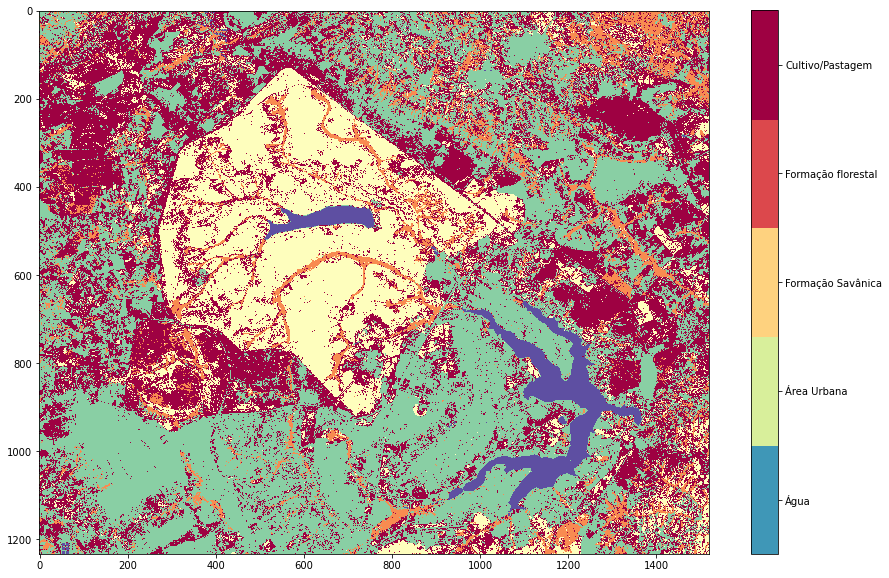

In [ ]:
bounds = [1,2,3,4,5,6]
cmap = cm.Spectral_r
norm = colors.BoundaryNorm(bounds, cmap.N)
classes = ['Água', 'Área Urbana', 'Formação Savânica', 'Formação florestal', 
           'Cultivo/Pastagem']

# Visualizando resultado
fig, ax = plt.subplots()
cax = ax.imshow(pred_final, cmap=cmap, interpolation='none')
bar = fig.colorbar(cax, cmap=cmap, norm = norm, boundaries = bounds, 
                   ticks = [i + 0.5 for i in bounds])
bar.ax.set_yticklabels(classes)
plt.show()